# **MNIST Handwritten Digit Recognizer using CNN**

## Project Overview
- Objective: Classify handwritten digit images (0–9) using a Convolutional Neural Network (CNN).
- Dataset: MNIST dataset (60,000 training images and 10,000 test images of size 28×28 in grayscale). [web:49][web:59]
- Tools: Python, TensorFlow/Keras, NumPy, Matplotlib, Seaborn, Scikit-learn. [web:49][web:59]
- Result: Test accuracy ≈ 95.1% with a simple CNN model.

**Libraries import + TF check**

In [6]:
# MNIST Handwritten Digit Recognizer

# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


**MNIST data load + basic info**

In [7]:
# 2. Load the MNIST dataset

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train images shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


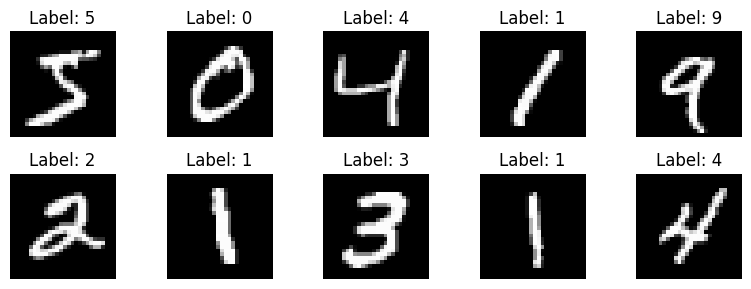

In [8]:
# 3. Visualize some sample images

plt.figure(figsize=(8, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## 2. Data preprocessing
- Normalize pixel values to the range [0, 1].
- Reshape images to (28, 28, 1) for the CNN input.

**Normalize + reshape + num_classes (IMPORTANT)**

In [11]:
# Fix: remove extra dimension if present

print("Before squeeze:", x_train.shape, x_test.shape)

# Remove all singleton (size 1) dimensions except the channel one
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)

print("After squeeze:", x_train.shape, x_test.shape)

# Now add only one channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Final train shape:", x_train.shape)
print("Final test shape:", x_test.shape)

Before squeeze: (60000, 28, 28, 1, 1) (10000, 28, 28, 1, 1)
After squeeze: (60000, 28, 28) (10000, 28, 28)
Final train shape: (60000, 28, 28, 1)
Final test shape: (10000, 28, 28, 1)


**CNN model define + compile**

In [12]:
# 5. Build the CNN model

model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [13]:
# 6. Train the model

history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.2441 - loss: 2.0754 - val_accuracy: 0.8668 - val_loss: 0.5002
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8464 - loss: 0.5119 - val_accuracy: 0.9162 - val_loss: 0.2997
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8919 - loss: 0.3620 - val_accuracy: 0.9328 - val_loss: 0.2367
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9190 - loss: 0.2757 - val_accuracy: 0.9472 - val_loss: 0.1880
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9327 - loss: 0.2282 - val_accuracy: 0.9578 - val_loss: 0.1519


## 5. Evaluation on the test set
- Print test accuracy and test loss.
- Plot the confusion matrix and show a few predictions.

In [14]:
# 7. Evaluate on test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Test accuracy: 0.9510999917984009
Test loss: 0.17092657089233398


**Confusion matrix + few predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


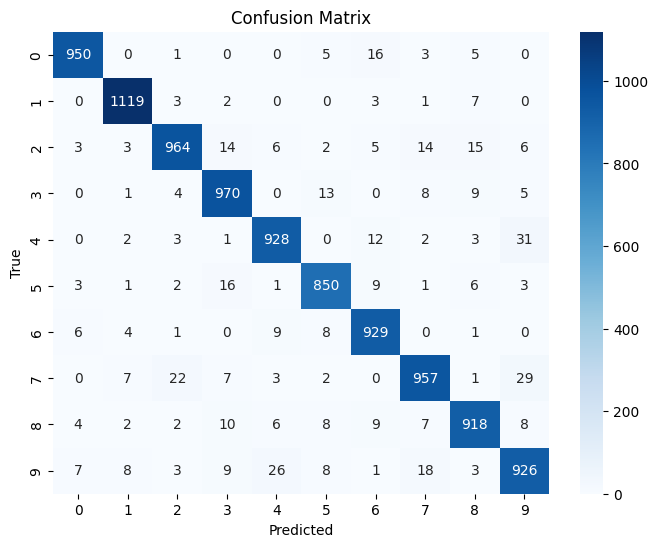

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.95      0.95       892
           6       0.94      0.97      0.96       958
           7       0.95      0.93      0.94      1028
           8       0.95      0.94      0.95       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 8. Confusion matrix

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

**Few sample predictions visualize**

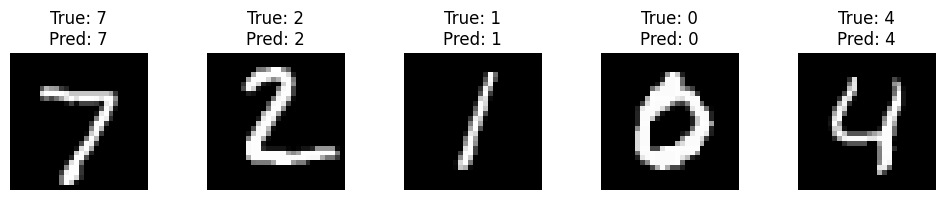

In [16]:
# 9. Visualize some predictions

num_images = 5
plt.figure(figsize=(10, 2))

for i in range(num_images):
    idx = i
    img = x_test[idx]

    plt.subplot(1, num_images, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")

plt.tight_layout()
plt.show()

## 6. Conclusions and future work
- The CNN achieves about 95% test accuracy on MNIST. [web:49][web:59]
- There is still some confusion between similar digits (e.g., 4 vs 9, 3 vs 5).
- Possible improvements: more epochs, data augmentation, deeper network, or regularization.